# 機械学習スクラッチ SVM

In [ ]:
import numpy as np
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter=1000, lr=1e-7, kernel='linear', threshold=0.7, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = 1
        self.theta = 0
        self.d = 1
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.base_label = np.unique(y)
        y = np.where(y==self.base_label[0], 1, -1)
            
        self.new_lmd = np.random.rand(X.shape[0], 1)
        for i in range(self.iter):
            self._update_lambda(X, y)
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | max lambda value: {2}'.format(i+1, self.iter, self.new_lmd.max()))
        y = y.reshape(-1, 1)
        tmp = np.concatenate([X, y], axis=1)
        self.combined_all = np.concatenate([tmp, self.new_lmd], axis=1)
        self._decision_support_vector()
        

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        f = self._predict(X)
        return f
    
    # 問題1
    # カーネル関数
    def _kernel_function(self, X):
        # X dimention:(n_samples, n_features)
        # 問題6
        if X.shape[1] <=2:
            return np.dot(X, X.T)
        elif X.shape[1] > 2:
            return (self.gamma * np.dot(X, X.T) + self.theta)**self.d

    # ラムダ更新
    def _update_lambda(self, X, y):
        # self._kernel_function dimention:(n_samples, n_samples)
        # np.dot(y, y.T) dimention:(n_samples, n_samples)
        # self.lmd.T dimention:(1, n_samples)
        # self.new_lmd diomention:(n_samples, 1)
        self.X_shape = X.shape
        y = y.reshape(-1, 1)
        tmp = self.lr * (1 - np.dot(self.new_lmd.T, np.dot(np.dot(y, y.T), self._kernel_function(X))))
        self.new_lmd = (self.new_lmd.T + tmp).reshape(-1, 1)
        self.new_lmd = np.where(self.new_lmd < 0, 0, self.new_lmd)
        
    def _decision_support_vector(self):
        # self.support_vector dimention:(n, X.shape[1] + y.shape[1] + new_lmd.shape[1]) ※ n < n_samples
        # 推定時にsupport_vectorに紐づいた特徴量やラベル情報を使う為
        self.support_vector = self.combined_all[self.combined_all[:, -1] > self.threshold]
        
    def _predict(self, X):
        y_times_lmd = (self.support_vector[:, -1] * self.support_vector[:, -2]).reshape(-1, 1)
        f = np.dot(np.dot(X, self.support_vector[:, :X.shape[1]].T), y_times_lmd)
        y_hat = np.sign(f)
        y_hat = np.where(y_hat == -1, self.base_label[1], self.base_label[0])
        return y_hat
    

【問題1】ラグランジュの未定乗数法による最急降下

In [8]:
import numpy as np
# カーネル関数
def _kernel_function(self, X):
    return np.dot(X, X.T)

# ラムダ更新
def _update_lambda(self, X, y):
    # self._kernel_function dimention:(n_samples, n_samples)
    # np.dot(y, y.T) dimention:(n_samples, n_samples)
    # self.lmd.T dimention:(1, n_samples)
    # self.new_lmd diomention:(n_samples, 1)
    self.X_shape = X.shape
    y = y.reshape(-1, 1)
    tmp = self.lr * (1 - np.dot(self.new_lmd.T, np.dot(np.dot(y, y.T), self._kernel_function(X))))
    self.new_lmd = (self.new_lmd.T + tmp).reshape(-1, 1)
    self.new_lmd = np.where(self.new_lmd < 0, 0, self.new_lmd)

【問題2】サポートベクターの決定

In [10]:
def _decision_support_vector(self):
    # self.support_vector dimention:(n, X.shape[1] + y.shape[1] + new_lmd.shape[1]) ※ n < n_samples
    # 推定時にsupport_vectorに紐づいた特徴量やラベル情報を使う為
    self.support_vector = self.combined_all[self.combined_all[:, -1] > self.threshold]

In [398]:
# # 実験
# a = np.random.rand(10, 1)
# b = np.random.rand(10, 1)
# d = np.random.rand(10, 1)
# c = np.concatenate([a, b], axis=1)
# c = np.concatenate([c, d], axis=1)
# c.shape
# print(a, b, c)

In [399]:
# a = np.random.rand(10, 1)
# b = np.random.rand(10, 1)
# print(np.dot(a, b.T).shape)

In [21]:
# c[c[:, -1] > 0.5]

In [400]:
# c[:, -2].shape

【問題3】推定

In [ ]:
def _predict(self, X):
    y_times_lmd = (self.support_vector[:, -1] * self.support_vector[:, -2]).reshape(-1, 1)
    f = np.dot(np.dot(X, self.support_vector[:, :X.shape[1]].T), y_times_lmd)
    y_hat = np.sign(f)
    y_hat = np.where(y_hat == -1, self.base_label[1], self.base_label[0])
    return y_hat

【問題4】学習と推定

In [50]:
import numpy as np
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter=1000, lr=1e-7, kernel='linear', threshold=0.95, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = 1
        self.theta = 0
        self.d = 1
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.base_label = np.unique(y)
        y = np.where(y==self.base_label[0], 1, -1)
            
        self.new_lmd = np.random.rand(X.shape[0], 1)
        for i in range(self.iter):
            self._update_lambda(X, y)
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | max lambda value: {2}'.format(i+1, self.iter, self.new_lmd.max()))
        y = y.reshape(-1, 1)
        tmp = np.concatenate([X, y], axis=1)
        self.combined_all = np.concatenate([tmp, self.new_lmd], axis=1)
        self._decision_support_vector()
        

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        f = self._predict(X)
        return f
    
    # 問題1
    # カーネル関数
    def _kernel_function(self, X):
        # X dimention:(n_samples, n_features)
        # 問題6
        if X.shape[1] <=2:
            return np.dot(X, X.T)
        elif X.shape[1] > 2:
            return (self.gamma * np.dot(X, X.T) + self.theta)**self.d

    # ラムダ更新
    def _update_lambda(self, X, y):
        # self._kernel_function dimention:(n_samples, n_samples)
        # np.dot(y, y.T) dimention:(n_samples, n_samples)
        # self.lmd.T dimention:(1, n_samples)
        # self.new_lmd diomention:(n_samples, 1)
        self.X_shape = X.shape
        y = y.reshape(-1, 1)
        tmp = self.lr * (1 - np.dot(self.new_lmd.T, np.dot(np.dot(y, y.T), self._kernel_function(X))))
        self.new_lmd = (self.new_lmd.T + tmp).reshape(-1, 1)
        self.new_lmd = np.where(self.new_lmd < 0, 0, self.new_lmd)
        
    def _decision_support_vector(self):
        # self.support_vector dimention:(n, X.shape[1] + y.shape[1] + new_lmd.shape[1]) ※ n < n_samples
        # 推定時にsupport_vectorに紐づいた特徴量やラベル情報を使う為
        self.support_vector = self.combined_all[self.combined_all[:, -1] > self.threshold]
        
    def _predict(self, X):
        y_times_lmd = (self.support_vector[:, -1] * self.support_vector[:, -2]).reshape(-1, 1)
        f = np.dot(np.dot(X, self.support_vector[:, :X.shape[1]].T), y_times_lmd)
        y_hat = np.sign(f)
        y_hat = np.where(y_hat == -1, self.base_label[1], self.base_label[0])
        return y_hat
    

In [114]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_data = iris.data[:100, :2]
iris_target = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=0)
SS = StandardScaler()
norm_X_train = SS.fit_transform(X_train)
norm_X_test = SS.transform(X_test)

In [115]:
y_train.shape

(80,)

In [116]:
SSVM = ScratchSVMClassifier(verbose=True)
SSVM.fit(norm_X_train, y_train)

1 / 1000 times done | max lambda value: 0.9999817845945064
2 / 1000 times done | max lambda value: 1.0000015493072973
3 / 1000 times done | max lambda value: 1.000021301611533
4 / 1000 times done | max lambda value: 1.000041041515043
5 / 1000 times done | max lambda value: 1.0000607690256522
6 / 1000 times done | max lambda value: 1.0000804841511808
7 / 1000 times done | max lambda value: 1.000100186899444
8 / 1000 times done | max lambda value: 1.0001198772782516
9 / 1000 times done | max lambda value: 1.0001395552954089
10 / 1000 times done | max lambda value: 1.0001592209587162
11 / 1000 times done | max lambda value: 1.000178874275969
12 / 1000 times done | max lambda value: 1.0001985152549577
13 / 1000 times done | max lambda value: 1.0002181439034679
14 / 1000 times done | max lambda value: 1.0002377602292798
15 / 1000 times done | max lambda value: 1.0002573642401695
16 / 1000 times done | max lambda value: 1.0002769559439075
17 / 1000 times done | max lambda value: 1.0002965353

306 / 1000 times done | max lambda value: 1.0054697413432856
307 / 1000 times done | max lambda value: 1.005486062367102
308 / 1000 times done | max lambda value: 1.005502373155352
309 / 1000 times done | max lambda value: 1.0055186737144943
310 / 1000 times done | max lambda value: 1.0055349640509836
311 / 1000 times done | max lambda value: 1.0055512441712704
312 / 1000 times done | max lambda value: 1.0055675140818012
313 / 1000 times done | max lambda value: 1.0055837737890185
314 / 1000 times done | max lambda value: 1.0056000232993605
315 / 1000 times done | max lambda value: 1.0056162626192615
316 / 1000 times done | max lambda value: 1.0056324917551518
317 / 1000 times done | max lambda value: 1.0056487107134575
318 / 1000 times done | max lambda value: 1.0056649195006009
319 / 1000 times done | max lambda value: 1.0056811181229999
320 / 1000 times done | max lambda value: 1.0056973065870685
321 / 1000 times done | max lambda value: 1.0057134848992169
322 / 1000 times done | ma

668 / 1000 times done | max lambda value: 1.0107570488703717
669 / 1000 times done | max lambda value: 1.0107700564128492
670 / 1000 times done | max lambda value: 1.0107830558105877
671 / 1000 times done | max lambda value: 1.0107960470687263
672 / 1000 times done | max lambda value: 1.0108090301924013
673 / 1000 times done | max lambda value: 1.0108220051867456
674 / 1000 times done | max lambda value: 1.0108349720568888
675 / 1000 times done | max lambda value: 1.0108479308079572
676 / 1000 times done | max lambda value: 1.0108608814450741
677 / 1000 times done | max lambda value: 1.0108738239733597
678 / 1000 times done | max lambda value: 1.0108867583979304
679 / 1000 times done | max lambda value: 1.0108996847238998
680 / 1000 times done | max lambda value: 1.0109126029563782
681 / 1000 times done | max lambda value: 1.0109255131004724
682 / 1000 times done | max lambda value: 1.0109384151612866
683 / 1000 times done | max lambda value: 1.010951309143921
684 / 1000 times done | m

In [117]:
SSVM.combined_all[:, -1]

array([0.87481828, 0.11269234, 1.01465755, 0.93045655, 0.38338535,
       0.88674553, 0.07333965, 0.40287589, 0.91726453, 0.30221048,
       0.76066679, 0.0322306 , 0.8835101 , 0.82870389, 0.95088123,
       0.78900045, 0.13820886, 0.76397229, 0.73882468, 0.89257253,
       0.56327348, 0.89368178, 0.47968773, 0.12938313, 0.16485764,
       0.75296923, 0.38692169, 0.86284954, 0.48451298, 0.78977679,
       0.52045059, 0.77964294, 0.02301174, 0.79036354, 0.29833486,
       0.27542242, 0.69410024, 0.23622828, 0.13305415, 0.17242276,
       0.59173305, 0.07244378, 0.99425662, 0.62340817, 0.88408807,
       0.15524744, 0.59681032, 0.74896415, 0.88366631, 0.24203953,
       1.00264822, 0.0653925 , 0.12962497, 0.09377124, 0.98297355,
       0.83933357, 0.26532645, 0.84492407, 0.96647659, 0.25603815,
       0.83740662, 0.87072934, 0.6528273 , 0.98562946, 0.77368066,
       0.6077422 , 0.57154591, 0.73910219, 0.55582354, 0.21214942,
       0.25624079, 0.79349923, 0.35276655, 0.17014191, 0.24830

In [118]:
len(SSVM.support_vector)

7

In [119]:
pred = SSVM.predict(norm_X_test)
pred

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [120]:
# 各種評価指標
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 100.0%
適合率: 100.0%
再現率: 100.0%
F値: 1.0


【問題5】決定領域の可視化

In [121]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(model.support_vector[:,0], model.support_vector[:, 1], s=80, color='yellow', label='SV', marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

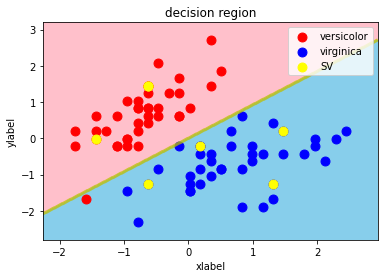

In [122]:
decision_region(norm_X_train, y_train, SSVM)

【問題6】（アドバンス課題）多項式カーネル関数の作成

In [ ]:
# カーネル関数
def _kernel_function(self, X):
    # X dimention:(n_samples, n_features)
    if X.shape[1] <=2:
        return np.dot(X, X.T)
    elif X.shape[1] > 2:
        return (self.gamma * np.dot(X, X.T) + self.theta)**self.d